##Import all libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,balanced_accuracy_score

##Load all the data from the  three given csv files for ODI, T20 and test match types

In [24]:
odi_vk =pd.read_csv('/content/virat_kohli_odi_innings_data.csv')
t20_vk=pd.read_csv('/content/virat_kohli_t20i_innings_data.csv')
test_vk=pd.read_csv('/content/virat_kohli_test_innings_data.csv')

In [25]:
odi_vk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        262 non-null    object
 1   Mins        262 non-null    object
 2   BF          262 non-null    object
 3   4s          262 non-null    object
 4   6s          262 non-null    object
 5   SR          262 non-null    object
 6   Pos         262 non-null    object
 7   Dismissal   262 non-null    object
 8   Inns        262 non-null    object
 9   Opposition  262 non-null    object
 10  Ground      262 non-null    object
 11  Start Date  262 non-null    object
 12  Odi No      262 non-null    object
dtypes: object(13)
memory usage: 26.7+ KB


In [26]:
t20_vk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        114 non-null    object
 1   Mins        114 non-null    object
 2   BF          114 non-null    object
 3   4s          114 non-null    object
 4   6s          114 non-null    object
 5   SR          114 non-null    object
 6   Pos         114 non-null    object
 7   Dismissal   114 non-null    object
 8   Inns        114 non-null    object
 9   Opposition  114 non-null    object
 10  Ground      114 non-null    object
 11  Start Date  114 non-null    object
 12  T20I No     114 non-null    object
dtypes: object(13)
memory usage: 11.7+ KB


In [27]:
test_vk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        180 non-null    object
 1   Mins        180 non-null    object
 2   BF          180 non-null    object
 3   4s          180 non-null    object
 4   6s          180 non-null    object
 5   SR          180 non-null    object
 6   Pos         180 non-null    object
 7   Dismissal   180 non-null    object
 8   Inns        180 non-null    object
 9   Opposition  180 non-null    object
 10  Ground      180 non-null    object
 11  Start Date  180 non-null    object
 12  Test No     180 non-null    object
dtypes: object(13)
memory usage: 18.4+ KB


##Create a new match_type variable by storing info on the type of match for each datapoint. This can be extracted from the csv filename for each type of match. The 3 categories will be: ODI,  T20,  TEST

In [28]:
odi_vk['Match_type']='ODI'
t20_vk['Match_type']='T20'
test_vk['Match_type']='TEST'

##Concatenate runs from all the match type and store in Runs. Similarly do for strike rate and store in SR and Grounds in ground

In [29]:
Runs=pd.concat([odi_vk['Runs'],t20_vk['Runs'],test_vk['Runs']],ignore_index=True)
SR=pd.concat([odi_vk['SR'],t20_vk['SR'],test_vk['SR']],ignore_index=True)
ground=pd.concat([odi_vk['Ground'],t20_vk['Ground'],test_vk['Ground']],ignore_index=True)
Type=pd.concat([odi_vk['Match_type'],t20_vk['Match_type'],test_vk['Match_type']],ignore_index=True)


##Create a data frame data_cricketer and store Runs, SR, match_type and grounds in it

In [30]:
data_cricketer=pd.DataFrame({'Runs':Runs,'SR':SR,'Grounds':ground,'Match_type':Type})
data_cricketer

,Runs,SR,Grounds,Match_type
0,12,54.54,Dambulla,ODI
1,37,55.22,Dambulla,ODI
2,25,65.78,Colombo (RPS),ODI
3,54,81.81,Colombo (RPS),ODI
4,31,67.39,Colombo (RPS),ODI
...,...,...,...,...
551,45,59.21,Mohali,TEST
552,23,47.91,Bengaluru,TEST
553,13,81.25,Bengaluru,TEST
554,11,57.89,Birmingham,TEST


In [31]:
data_cricketer['Runs']=data_cricketer['Runs'].replace('DNB','0').replace('TDNB','0').astype(int)
data_cricketer['SR']=data_cricketer['SR'].replace('-','0').astype(float)

##From data_cricketer, store Runs and SR in X and match_type in Y

In [32]:
X=data_cricketer[['Runs','SR']]
Y=data_cricketer[['Match_type']]

##Split the data X and Y in x_train, x_test, y_train , y_test. Use test size=0.3 and random state=0

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

##Use sklearn to perform SVM classification on this data. Try different kernels to find out the best one for your data

In [34]:
kernel=['linear','poly','rbf','sigmoid']
acc_list=[]
con_mats=[]

In [35]:
for i in kernel:
  svc=SVC(kernel=i)
  svc.fit(x_train,y_train)
  pred=svc.predict(x_test)
  acc=accuracy_score(y_test,pred)
  conmat=confusion_matrix(y_test,pred)
  acc_list.append(acc)
  con_mats.append(conmat)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [36]:
acc_list

[0.6646706586826348,
 0.7005988023952096,
 0.6946107784431138,
 0.20359281437125748]

**Polynomial Kernel gives the best accuracy.**

##Fit a SVM classification model with a Polynomial kernel with degree 6

For this model, compute confusion matrix, accuracy and balanced accuracy

In [37]:
svc=SVC(kernel='poly',degree=6)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)
bal_accuracy=balanced_accuracy_score(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print(f'Accuracy for model using Polynomial Kernel of degree 6:{accuracy}/n Balanced accuracy :{bal_accuracy} ')

Accuracy for model using Polynomial Kernel of degree 6:0.7065868263473054/n Balanced accuracy :0.6797121007647323 


## Plot confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

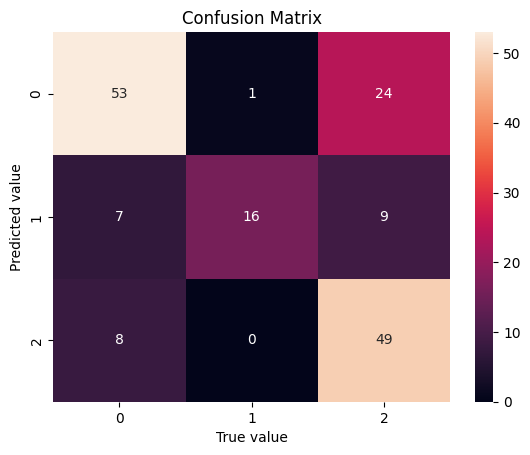

In [39]:
sns.heatmap(conmat,annot=True)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('Confusion Matrix')

##Also print classification report that includes precision, recall, f1 score and accuracy

In [40]:
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

         ODI       0.78      0.68      0.73        78
         T20       0.94      0.50      0.65        32
        TEST       0.60      0.86      0.71        57

    accuracy                           0.71       167
   macro avg       0.77      0.68      0.69       167
weighted avg       0.75      0.71      0.70       167



##Create a scatter plot for Runs scored on x-axis and strike rate on y-axis. Group each point by match type (by assigning a different colour for each match type on the plot)



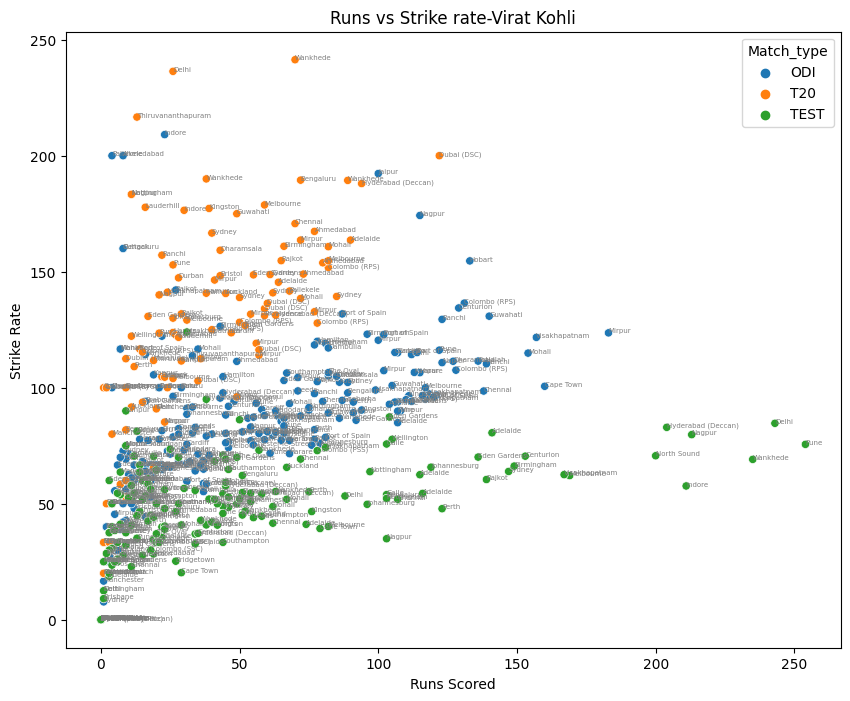

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_cricketer,x='Runs',y='SR',hue='Match_type',marker='o')
plt.xlabel('Runs Scored')
plt.ylabel('Strike Rate')
plt.title('Runs vs Strike rate-Virat Kohli')
for i,name in enumerate(data_cricketer['Grounds']):
  plt.annotate(name,(data_cricketer.iloc[i]['Runs'],data_cricketer.iloc[i]['SR']),fontsize=5,color='grey',fontweight='ultralight')

In [43]:
aclist=[]
degree=list(range(1,9))
for i in degree:
  svc=SVC(kernel='poly',degree=i)
  svc.fit(x_train,y_train)
  pred=svc.predict(x_test)
  acc=accuracy_score(y_test,pred)
  aclist.append(acc)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

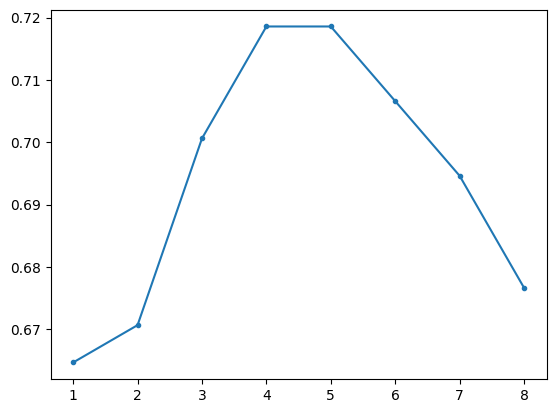

In [44]:
plt.plot(degree,aclist,marker='.')